In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [2]:

# Đọc dữ liệu từ tập tin CSV
df = pd.read_csv('SAMSUNG.csv', header=0, parse_dates=[0], index_col=0)

In [3]:
# Chọn cột 'Price' và loại bỏ giá trị NaN
df = df[['Price']].dropna()


In [4]:
# Chia dữ liệu thành tập train và test (80% train, 20% test)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [5]:
# Tính returns cho mô hình GARCH
train_returns = 100 * train['Price'].pct_change().dropna()
test_returns = 100 * test['Price'].pct_change().dropna()


In [6]:
# Tạo mô hình GARCH
model = arch_model(train_returns, mean='Zero', vol='GARCH', p=1, q=1)

In [7]:
# Fit model
garch_fit = model.fit(disp='off')

In [10]:
# Dự đoán độ biến động cho test set
forecast = garch_fit.forecast(horizon=len(test_returns))
predicted_volatility = forecast.variance.values[-1, :]

# Đánh giá mô hình
rmse = np.sqrt(mean_squared_error(test_returns, predicted_volatility))
mae = mean_absolute_error(test_returns, predicted_volatility)
mape = mean_absolute_percentage_error(test_returns, predicted_volatility)

print('Test RMSE:', rmse)
print('Test MAE:', mae)
print('Test MAPE:', mape)

Test RMSE: 2.4348421697479887
Test MAE: 2.194181291345543
Test MAPE: inf


In [11]:
# Dự đoán độ biến động cho 30 ngày tiếp theo
future_forecast = garch_fit.forecast(horizon=30, start=train_returns.index[-1])

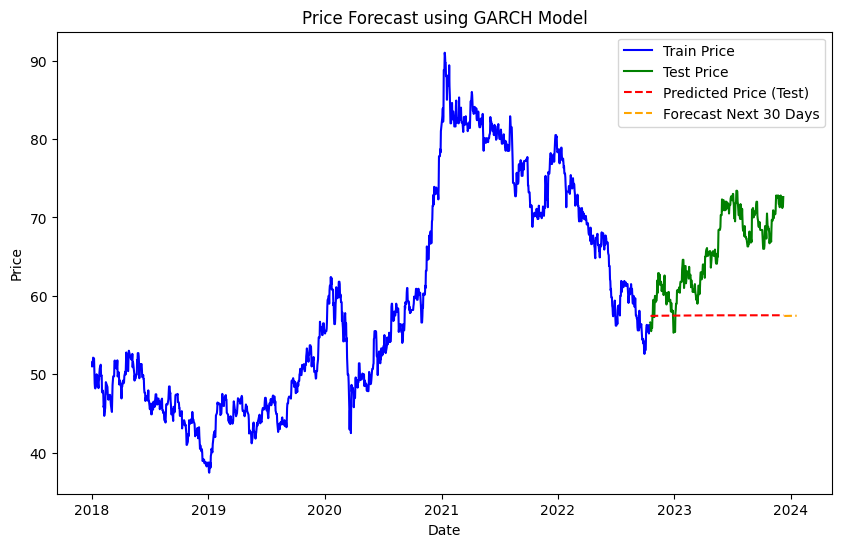

In [12]:
# Vẽ đồ thị
plt.figure(figsize=(10, 6))

# Vẽ giá trị train và test thực tế
plt.plot(train['Price'], color='blue', label='Train Price')
plt.plot(test['Price'], color='green', label='Test Price')

# Tính giá dự đoán từ độ biến động (chú ý rằng đây không phải là cách tiêu chuẩn để dự đoán giá)
# Độ biến động không trực tiếp chuyển đổi thành giá cổ phiếu
# Chúng tôi sẽ sử dụng một phương pháp đơn giản để minh họa: áp dụng độ biến động trên giá cuối cùng của train set
last_train_price = train['Price'].iloc[-1]
predicted_prices = last_train_price * (1 + predicted_volatility / 100)
predicted_future_prices = last_train_price * (1 + future_forecast.variance.values[-1, :] / 100)

# Vẽ dự đoán giá cho test set
plt.plot(test.index[1:], predicted_prices, color='red', linestyle='dashed', label='Predicted Price (Test)')

# Vẽ dự đoán giá cho 30 ngày tiếp theo
future_dates = pd.date_range(test.index[-1], periods=31, freq='B')[1:]
plt.plot(future_dates, predicted_future_prices, color='orange', linestyle='dashed', label='Forecast Next 30 Days')

plt.title('Price Forecast using GARCH Model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [13]:
# Calculate RMSE, MAE, and MAPE for the test set
rmse = np.sqrt(mean_squared_error(test['Price'][1:], predicted_prices))
mae = mean_absolute_error(test['Price'][1:], predicted_prices)
mape = mean_absolute_percentage_error(test['Price'][1:], predicted_prices)

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

RMSE: 9.521581016578313
MAE: 8.28975949236638
MAPE: 12.153796802055108


Text(0, 0.5, 'Price')

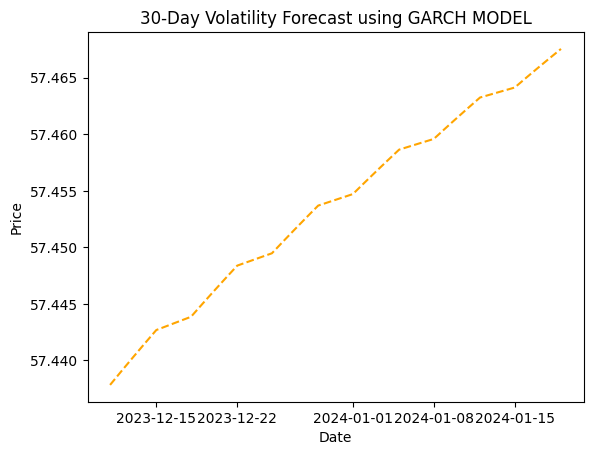

In [14]:
# Vẽ dự đoán giá cho 30 ngày tiếp theo
future_dates = pd.date_range(test.index[-1], periods=31, freq='B')[1:]
plt.plot(future_dates, predicted_future_prices, color='orange', linestyle='dashed', label='Forecast Next 30 Days')
plt.title('30-Day Volatility Forecast using GARCH MODEL')
plt.xlabel('Date')
plt.ylabel('Price')

RMSE: 9.521581016578313
MAE: 8.28975949236638
MAPE: 12.153796802055108


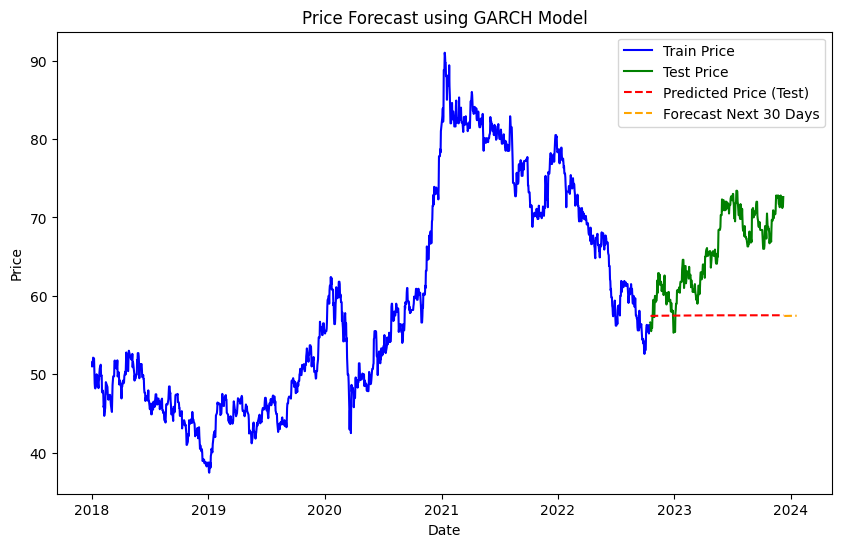

Text(0, 0.5, 'Price')

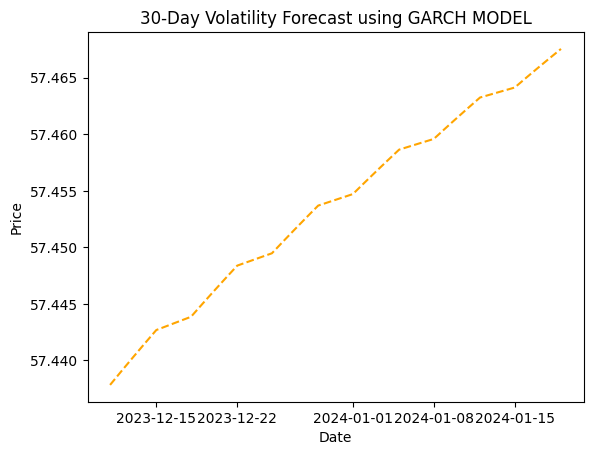

In [15]:
#code dự phòng TH2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Read data from CSV file
df = pd.read_csv('SAMSUNG.csv', header=0, parse_dates=[0], index_col=0)
df = df[['Price']].dropna()

# Split data into training and testing sets (80% train, 20% test)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Calculate returns for the GARCH model
train_returns = 100 * train['Price'].pct_change().dropna()
test_returns = 100 * test['Price'].pct_change().dropna()

# Create and fit the GARCH model
model = arch_model(train_returns, mean='Zero', vol='GARCH', p=1, q=1)
garch_fit = model.fit(disp='off')

# Forecast volatility for the test set
forecast = garch_fit.forecast(horizon=len(test_returns))
predicted_volatility = forecast.variance.values[-1, :]

# Forecast volatility for the next 30 days
future_forecast = garch_fit.forecast(horizon=30, start=train_returns.index[-1])

# Plot actual train and test prices
plt.figure(figsize=(10, 6))
plt.plot(train['Price'], color='blue', label='Train Price')
plt.plot(test['Price'], color='green', label='Test Price')

# Calculate and plot predicted prices for the test set
last_train_price = train['Price'].iloc[-1]
predicted_prices = last_train_price * (1 + predicted_volatility / 100)
plt.plot(test.index[1:], predicted_prices, color='red', linestyle='dashed', label='Predicted Price (Test)')

# Calculate RMSE, MAE, and MAPE for the test set
rmse = np.sqrt(mean_squared_error(test['Price'][1:], predicted_prices))
mae = mean_absolute_error(test['Price'][1:], predicted_prices)
mape = mean_absolute_percentage_error(test['Price'][1:], predicted_prices)

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

# Plot the 30-day price forecast
future_dates = pd.date_range(test.index[-1], periods=31, freq='B')[1:]
predicted_future_prices = last_train_price * (1 + future_forecast.variance.values[-1, :] / 100)
plt.plot(future_dates, predicted_future_prices, color='orange', linestyle='dashed', label='Forecast Next 30 Days')

# Finalize the plot
plt.title('Price Forecast using GARCH Model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


# Vẽ dự đoán giá cho 30 ngày tiếp theo
future_dates = pd.date_range(test.index[-1], periods=31, freq='B')[1:]
plt.plot(future_dates, predicted_future_prices, color='orange', linestyle='dashed', label='Forecast Next 30 Days')
plt.title('30-Day Volatility Forecast using GARCH MODEL')
plt.xlabel('Date')
plt.ylabel('Price')
